In [1]:
import os; os.chdir('..')
%load_ext autoreload
%autoreload 2

In [2]:

import pandas as pd
import numpy as np
from pathlib import Path

import cv2 as cv
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pydicom as dicom

from dataset.stroke import StrokeDataset, StrokeTorchDataset




# Image Read and Histogram Normalization

In [216]:
dicom_path = Path('./input/teknofest/raw/ISKEMI/DICOM/10003.dcm')
mask_path = Path('./input/teknofest/raw/ISKEMI/MASK/10003.png')

## Mask

In [217]:
mask = StrokeTorchDataset.read_mask(mask_path)

## Raw image

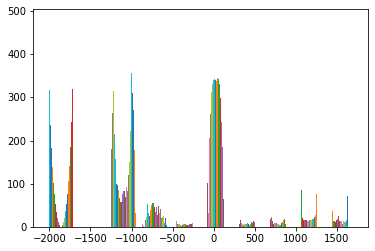

In [218]:
img_raw = StrokeTorchDataset.read_image(path=dicom_path, raw=True)
plt.hist(img_raw)
plt.show()

In [219]:
mu, sigma, window_values = StrokeTorchDataset.vstatistic(img_raw, vmin=-500, vmax=500)
fig = go.Figure(data=[go.Histogram(x=window_values)])
fig

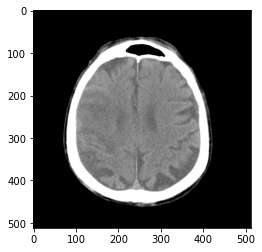

In [220]:
plt.imshow(StrokeTorchDataset.vcrop(img_raw, vmean=mu, vwidth=sigma*2), cmap=plt.cm.gray)

## VCrop Image

In [58]:
img = StrokeTorchDataset.read_image(path=dicom_path)

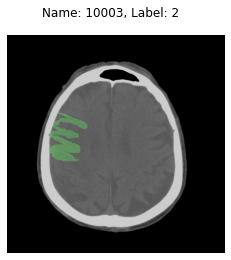

In [222]:
plt.imshow(StrokeDataset.overlay(img, mask, label=2, name='10003'))

# DICOM

In [3]:
import pydicom as dicom
import matplotlib.pyplot as plt 
import matplotlib.image as mpimage
import numpy as np 
# load some handy functions from the scikit-image library

from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank

# import operating system and glob libraries

import os, glob

# import some useful date functions

from datetime import datetime

C:\Users\ugur\Anaconda3\envs\stroke\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:176: UserWarning:

The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value



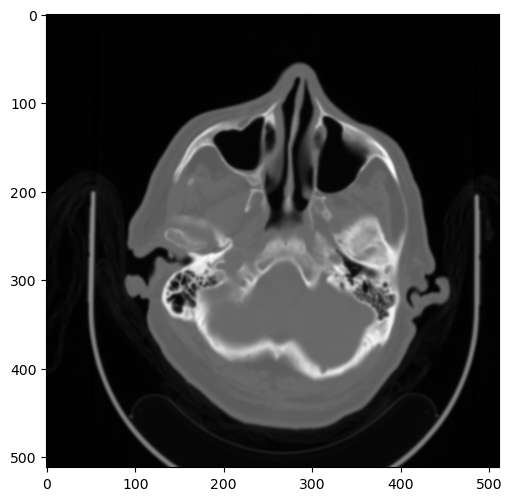

In [274]:
d = dicom.dcmread(Path('./input/teknofest/raw/KANAMA/DICOM/10605.dcm'))
mask = cv.imread(str(Path('./input/teknofest/raw/KANAMA/MASK/10605.png')))
mask = cv.cvtColor(mask, cv.COLOR_BGR2GRAY)

img = d.pixel_array

plt.figure(figsize = (6,6), dpi=100)
plt.imshow(img, cmap=plt.cm.gray) 

C:\Users\ugur\Anaconda3\envs\stroke\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:176: UserWarning:

The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


40 110


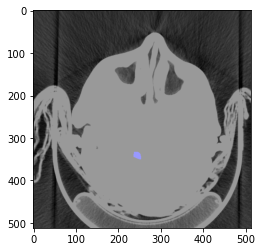

In [295]:
img_raw = img = StrokeTorchDataset.read_image(str(Path('./input/teknofest/raw/KANAMA/DICOM/10605.dcm')), raw=True)
img = StrokeTorchDataset.read_image(str(Path('./input/teknofest/raw/KANAMA/DICOM/10605.dcm')))
mask = StrokeTorchDataset.read_mask(str(Path('./input/teknofest/raw/KANAMA/MASK/10605.png')))

clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
img_clahe = clahe.apply(img)

plt.imshow(img_clahe, cmap=plt.cm.gray)
plt.imshow(StrokeDataset.mask_gray2channel(mask), alpha=0.4)


40 120


(43.34975051879883, 45.18081283569336)

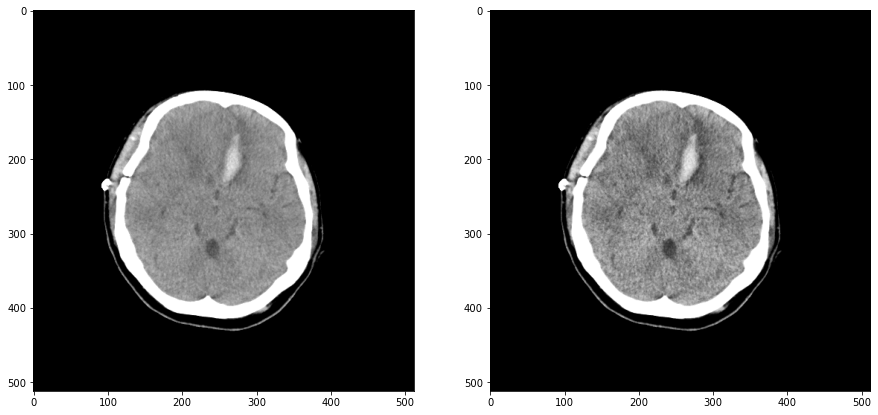

In [333]:
img_raw = StrokeTorchDataset.read_image(str(Path('./input/teknofest/raw/KANAMA/DICOM/10002.dcm')), raw=True)
mask = StrokeTorchDataset.read_mask(str(Path('./input/teknofest/raw/KANAMA/MASK/10002.png')))
print(img_raw.WindowCenter, img_raw.WindowWidth)

def process(img, window_center, window_width):
    img_vcrop = StrokeTorchDataset.vcrop(img, vmean=window_center, vwidth=window_width)
    clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))    
    img_vcrop_clahe = clahe.apply(img_vcrop)
    return img_vcrop, img_vcrop_clahe

fig, axes = plt.subplots(ncols=2, figsize=(15,15))

_img_vcrop, _img_vcrop_clahe = process(img_raw.pixel_array, 40, 120)


axes[0].imshow(_img_vcrop, cmap=plt.cm.gray)
axes[1].imshow(_img_vcrop_clahe, cmap=plt.cm.gray)

_img_vcrop.mean(), _img_vcrop_clahe.mean()

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-ttbyx0jz\opencv\modules\imgproc\src\clahe.cpp:353: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function '`anonymous-namespace'::CLAHE_Impl::apply'


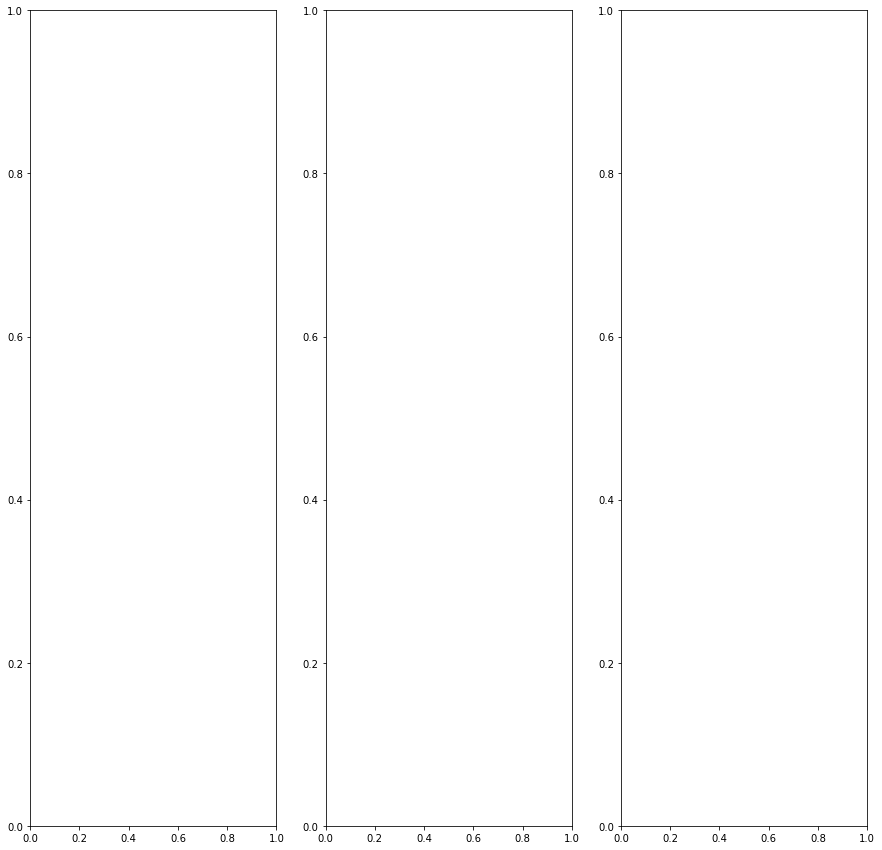

In [327]:
img_raw = StrokeTorchDataset.read_image(str(Path('./input/teknofest/raw/KANAMA/DICOM/10002.dcm')), raw=True)
mask = StrokeTorchDataset.read_mask(str(Path('./input/teknofest/raw/KANAMA/MASK/10002.png')))
img = img_raw.pixel_array

intercept = float(img_raw.RescaleIntercept)
slope = float(img_raw.RescaleSlope)


img[ img <= -1000] = 0
img = np.int16(img * slope + intercept)

fig, axes = plt.subplots(ncols=3, figsize=(15,15))

_img, _img_clahe, _img_vcrop_clahe = process(img, 40, 30)

axes[0].imshow(_img, cmap=plt.cm.gray)
axes[1].imshow(_img_clahe, cmap=plt.cm.gray)
axes[2].imshow(_img_vcrop_clahe, cmap=plt.cm.gray)


In [326]:
img

array([[-1000,  -997,  -996, ..., -1002, -1000, -1000],
       [-1001,  -998,  -997, ..., -1002, -1001, -1000],
       [-1002, -1000,  -998, ..., -1002, -1002, -1000],
       ...,
       [ -999,  -999,  -999, ...,  -998,  -998,  -998],
       [ -997,  -998,  -998, ...,  -996,  -996,  -998],
       [ -997,  -997,  -999, ...,  -996,  -998,  -998]], dtype=int16)

(array([[512.,   0.,   0., ...,   0.,   0.,   0.],
        [512.,   0.,   0., ...,   0.,   0.,   0.],
        [512.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [512.,   0.,   0., ...,   0.,   0.,   0.],
        [512.,   0.,   0., ...,   0.,   0.,   0.],
        [512.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([-1024. ,  -764.6,  -505.2,  -245.8,    13.6,   273. ,   532.4,
          791.8,  1051.2,  1310.6,  1570. ]),
 <a list of 512 BarContainer objects>)

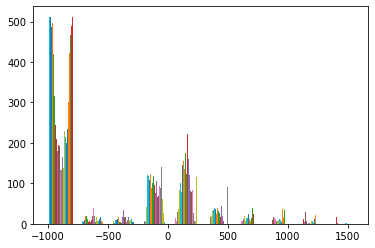

In [322]:
plt.hist(img)

In [316]:
float(slope)

1.0

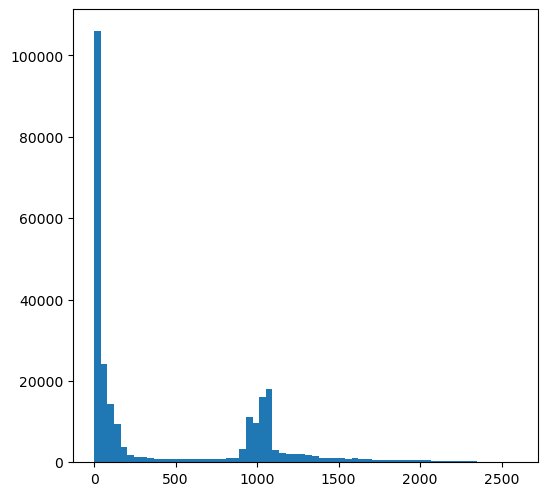

pixel array =  (512, 512)
minimum value =  0
maximum value =  2594


In [260]:
plt.figure(figsize = (6,6), dpi=100)

plt.hist(ds1.pixel_array.flatten(), bins=64) # calculate a histogram of our image
plt.show() # display that histogram

print ("pixel array = ", ds1.pixel_array.shape)
print("minimum value = ", np.amin(ds1.pixel_array)) # find minimum pixel value in the image array
print("maximum value = ", np.amax(ds1.pixel_array)) # find maximum pixel value in the image array

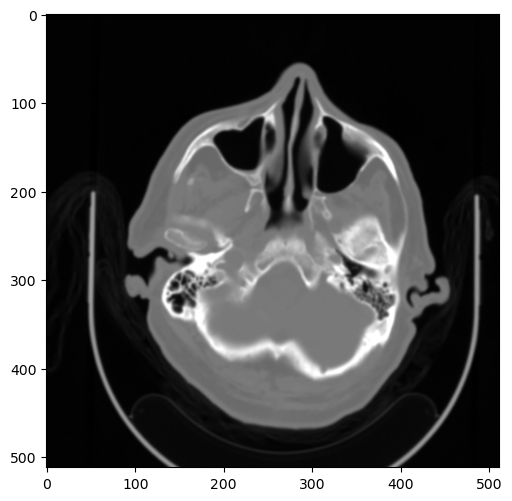

In [259]:
# Contrast stretching try 1
plt.figure(figsize = (6,6), dpi=100)

p_lo, p_hi = np.percentile(ds1.pixel_array, (0, 99.5))

img_rescale_1 = exposure.rescale_intensity(ds1.pixel_array, in_range=(p_lo, p_hi))

figure = plt.imshow(img_rescale_1, cmap=plt.cm.gray)

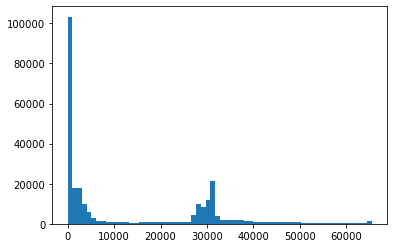

p_lo =  0.0
p_hi =  2226.0


In [262]:
plt.hist(img_rescale_1.flatten(), bins=64)
plt.show()
print("p_lo = ", p_lo)
print("p_hi = ",p_hi)

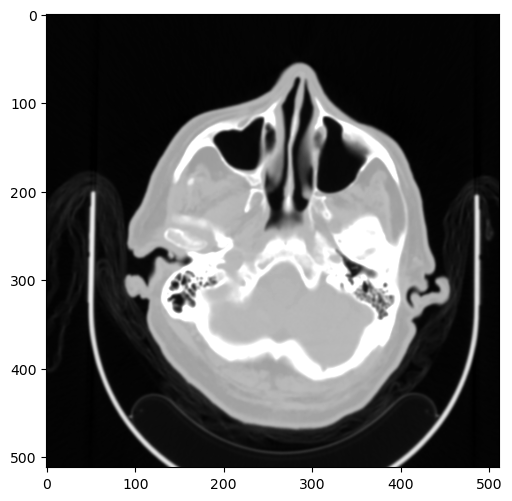

In [263]:
# Contrast stretching try 2
plt.figure(figsize = (6,6), dpi=100)

p_lo, p_hi = np.percentile(ds1.pixel_array, (0, 95))
img_rescale_2 = exposure.rescale_intensity(ds1.pixel_array, in_range=(p_lo, p_hi))

figure = plt.imshow(img_rescale_2, cmap=plt.cm.gray)

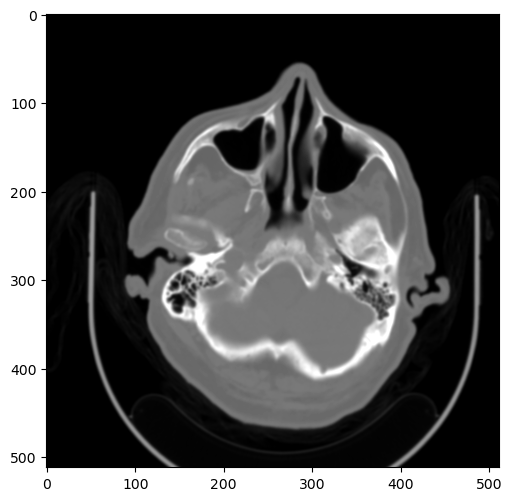

In [264]:
# Contrast stretching try 3
plt.figure(figsize = (6,6), dpi=100)

p_lo, p_hi = np.percentile(ds1.pixel_array, (40, 99.5))
img_rescale_3 = exposure.rescale_intensity(ds1.pixel_array, in_range=(p_lo, p_hi))

figure = plt.imshow(img_rescale_3, cmap=plt.cm.gray)

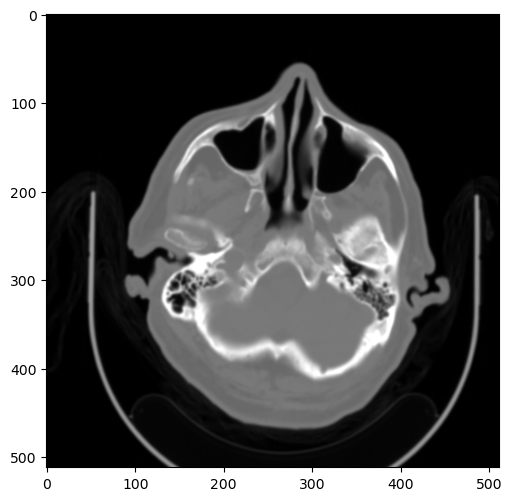

In [265]:
# Contrast stretching try 4
plt.figure(figsize = (6,6), dpi=100)

p_lo, p_hi = np.percentile(ds1.pixel_array, (20, 99.5))
img_rescale_4 = exposure.rescale_intensity(ds1.pixel_array, in_range=(p_lo, p_hi))

figure = plt.imshow(img_rescale_4, cmap=plt.cm.gray)

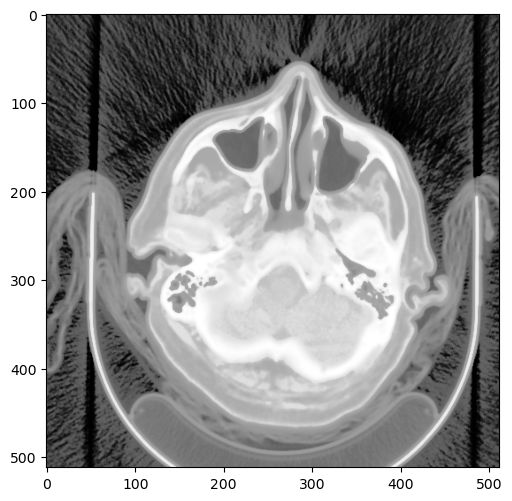

In [267]:
plt.figure(figsize = (6,6), dpi=100)

img_global_eq = exposure.equalize_hist(ds1.pixel_array)
figure = plt.imshow(img_global_eq, cmap=plt.cm.gray)

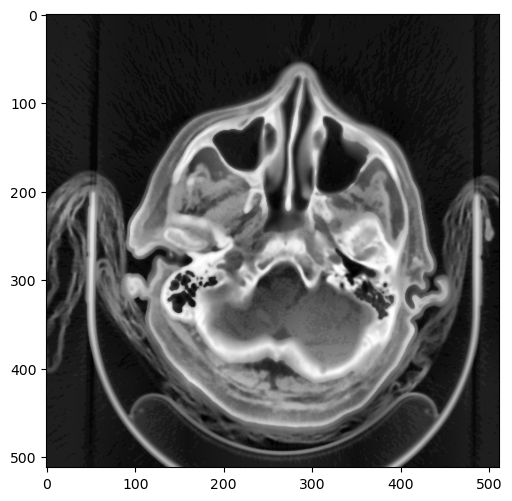

In [268]:
plt.figure(figsize = (6,6), dpi=100)

img_adaptive = exposure.equalize_adapthist(ds1.pixel_array, clip_limit=0.040)
figure = plt.imshow(img_adaptive, cmap=plt.cm.gray)

In [271]:
from ipywidgets import interactive, interact, widgets, Layout, Button, Box
from IPython.display import display

ModuleNotFoundError: No module named 'ipywidgets'

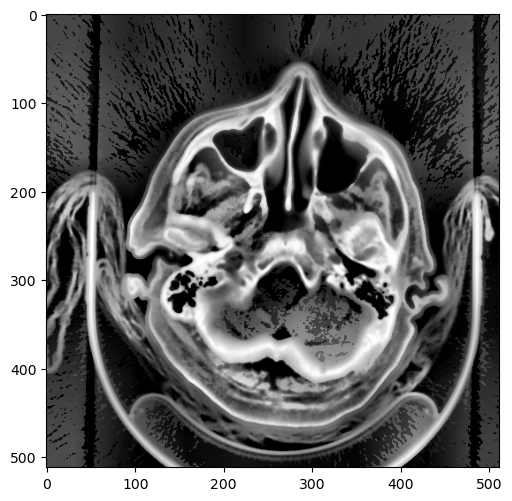

In [270]:
clip=0.2
percentile_lo=11.0
percentile_hi=100.0

plt.figure(figsize = (6,6), dpi=100)
img_adaptive = exposure.equalize_adapthist(ds1.pixel_array, clip_limit=clip)
p_lo, p_hi = np.percentile(img_adaptive, (percentile_lo, percentile_hi))
img_rescale = exposure.rescale_intensity(img_adaptive, in_range=(p_lo, p_hi))
plt.imshow(img_rescale, cmap=plt.cm.gray)

# DataClass

In [23]:
dataset = StrokeDataset()

458.51744079589844
180.17644500732422


C:\Users\ugur\Anaconda3\envs\stroke\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:176: UserWarning:

The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value



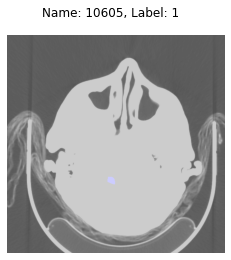

In [224]:
_=dataset.overlay(**dataset.trainset.getitem_by_name(name='10605'))

40 110


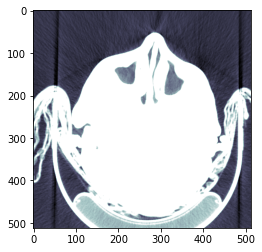

In [254]:
name = '10605'
img = StrokeTorchDataset.read_image(path=Path(f'./input/teknofest/raw/KANAMA/DICOM/{name}.dcm'))
mask = StrokeTorchDataset.read_mask(path=Path(f'./input/teknofest/raw/KANAMA/MASK/{name}.png'))
plt.imshow(img, cmap=plt.cm.bone)

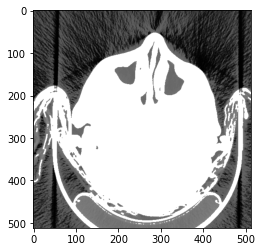

In [252]:
from skimage import exposure

def histogram_equalize(img):
    img_cdf, bin_centers = exposure.cumulative_distribution(img)
    return np.interp(img, bin_centers, img_cdf)

plt.imshow(histogram_equalize(img), cmap=plt.cm.gray)

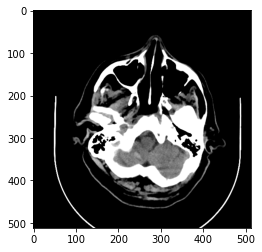

In [240]:
img_png = cv.imread(f'./input/teknofest/raw/KANAMA/PNG/{name}.png')
img_png = cv.cvtColor(img_png, cv.COLOR_BGR2GRAY)
plt.imshow(img_png, cmap=plt.cm.gray)

C:\Users\ugur\Anaconda3\envs\stroke\lib\site-packages\pydicom\pixel_data_handlers\pillow_handler.py:176: UserWarning:

The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value



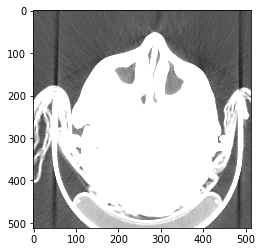

In [241]:
windowLevel = 40
windowWidth = 110
img_raw = StrokeTorchDataset.read_image(path=Path(f'./input/teknofest/raw/KANAMA/DICOM/{name}.dcm'), raw=True)
plt.imshow(img_raw, cmap=plt.cm.gray, vmin = windowLevel - windowWidth / 2, vmax = windowLevel + windowWidth / 2)

In [243]:
dcm = dicom.dcmread(Path(f'./input/teknofest/raw/KANAMA/DICOM/{name}.dcm'))
dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 218
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.33.1.63706565369198255900001.5565715524218782992
(0002, 0010) Transfer Syntax UID                 UI: JPEG 2000 Image Compression (Lossless Only)
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.30071.8
(0002, 0013) Implementation Version Name         SH: 'fo-dicom 4.0.0'
(0002, 0016) Source Application Entity Title     AE: 'TEKNOYPYZEKA'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0018, 0050) Slice Thickness                     DS: "3.0"
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028, 0010) Rows                

In [247]:
dcm.WindowCenter

[40, 40]

# Tutorial (https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial)

## Loading the files

The unit of measurement in CT scans is the Hounsfield Unit (HU), which is a measure of radiodensity. CT scanners are carefully calibrated to accurately measure this. From Wikipedia:

![](http://i.imgur.com/4rlyReh.png)

By default however, the returned values are not in this unit. Let's fix this.

Some scanners have cylindrical scanning bounds, but the output image is square. The pixels that fall outside of these bounds get the fixed value -2000. The first step is setting these values to 0, which currently corresponds to air. Next, let's go back to HU units, by multiplying with the rescale slope and adding the intercept (which are conveniently stored in the metadata of the scans!).

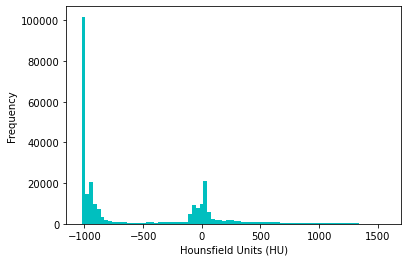

In [17]:
image_path = str(Path('./input/teknofest/raw/KANAMA/DICOM/10605.dcm'))
mask_path = str(Path('./input/teknofest/raw/KANAMA/MASK/10605.png'))

scan = StrokeTorchDataset.read_scan(image_path)
mask = StrokeTorchDataset.read_mask(mask_path)
hu_img = StrokeTorchDataset.scan2hu(scan=scan)

plt.hist(hu_img.flatten(), bins=80, color='c')
plt.xlabel("Hounsfield Units (HU)")
plt.ylabel("Frequency")
plt.savefig('hu_hist.png', bbox_inches = 'tight')
plt.show()

# plt.imshow(hu_img, cmap=plt.cm.gray)
# plt.axis('off')
# # plt.show()
# plt.savefig('hu_img.png', bbox_inches = 'tight',
#     pad_inches = 0)


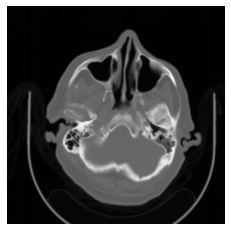

In [32]:

scan_v = scan.pixel_array
scan_img = np.uint8((scan_v - scan_v.min()) / (scan_v.max() - scan_v.min())*255)
plt.imshow(scan_img, cmap=plt.cm.gray)
plt.axis('off')
# plt.show()
plt.savefig('scan_img.png', bbox_inches = 'tight',
    pad_inches = 0)

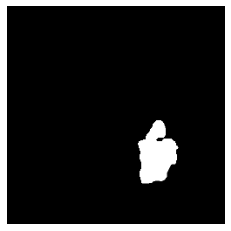

In [30]:
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
# plt.show()
plt.savefig('mask.png', bbox_inches = 'tight',
    pad_inches = 0)

## Resampling

A scan may have a pixel spacing of [2.5, 0.5, 0.5], which means that the distance between slices is 2.5 millimeters. For a different scan this may be [1.5, 0.725, 0.725], this can be problematic for automatic analysis (e.g. using ConvNets)!

A common method of dealing with this is resampling the full dataset to a certain isotropic resolution. If we choose to resample everything to 1mm1mm1mm pixels we can use 3D convnets without worrying about learning zoom/slice thickness invariance.

Whilst this may seem like a very simple step, it has quite some edge cases due to rounding. Also, it takes quite a while.

Shape before resampling	 (512, 512)
Shape after resampling	 (249, 249)


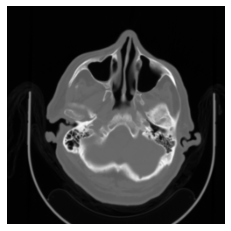

In [18]:
pix_resampled, spacing = StrokeTorchDataset.resample(image=hu_img, scan=scan, new_spacing=np.array([1., 1.]))
mask_resampled, mask_spacing = StrokeTorchDataset.resample(image=mask, scan=scan, new_spacing=np.array([1., 1.]))
print("Shape before resampling\t", hu_img.shape)
print("Shape after resampling\t", pix_resampled.shape)

plt.imshow(pix_resampled, cmap=plt.cm.gray)
plt.axis('off')
# # plt.show()
plt.savefig('pix_resampled.png', bbox_inches = 'tight',
    pad_inches = 0)



## Normalization

Our values currently range from -1024 to around 2000. Anything above 400 is not interesting to us, as these are simply bones with different radiodensity. A commonly used set of thresholds in the LUNA16 competition to normalize between are -1000 and 400. Here's some code you can use:

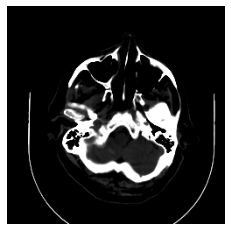

In [19]:
norm_pix_resampled = StrokeTorchDataset.normalize(pix_resampled)
plt.imshow(norm_pix_resampled, cmap=plt.cm.gray)
plt.axis('off')
# # plt.show()
plt.savefig('norm_pix_resampled.png', bbox_inches = 'tight',
    pad_inches = 0)

## Zero centering

As a final preprocessing step, it is advisory to zero center your data so that your mean value is 0. To do this you simply subtract the mean pixel value from all pixels.

To determine this mean you simply average all images in the whole dataset. If that sounds like a lot of work, we found this to be around 0.25 in the LUNA16 competition.

**Warning: Do not zero center with the mean per image (like is done in some kernels on here). The CT scanners are calibrated to return accurate HU measurements. There is no such thing as an image with lower contrast or brightness like in normal pictures.**

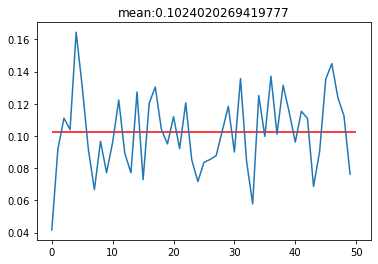

KeyboardInterrupt: 

In [95]:
from IPython.display import clear_output

print('Do not forget to remove zero_center() from preproces()')
dataset = StrokeDataset()
image_paths = [path['image'] for path in dataset.paths]
np.random.shuffle(image_paths)

means = []
for path in image_paths:
    image = dataset.trainset.preprocess(path=path, center=False)
    means.append(image.mean())
    
    clear_output(wait=True)
    fig, ax = plt.subplots()
    _means = np.array(means)
    ax.plot(_means)
    ax.hlines(_means.mean(), 0, len(_means), color='red')
    ax.set_title(f'mean:{_means.mean()}')
    plt.show()


    
    


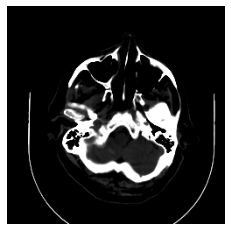

In [20]:
centered = StrokeTorchDataset.zero_center(norm_pix_resampled)

plt.imshow(centered, cmap=plt.cm.gray)
plt.axis('off')
# # plt.show()
plt.savefig('centered.png', bbox_inches = 'tight',
    pad_inches = 0)

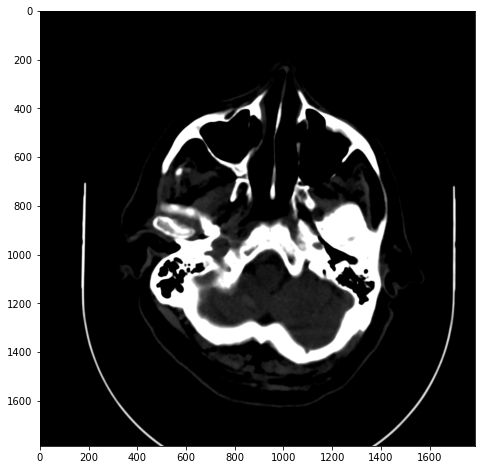

In [102]:
plt.figure(figsize=(8,8))
plt.imshow(centered, cmap=plt.cm.gray)

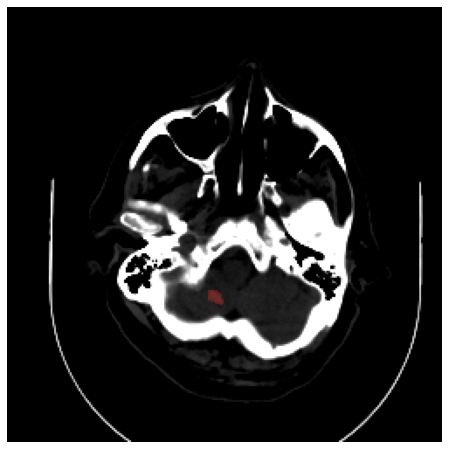

In [21]:
img = np.uint8((centered - centered.min()) / (centered.max() - centered.min())*255)

plt.figure(figsize=(8,8))
_ = StrokeDataset.overlay(img, mask_resampled, alpha=0.3)

In [25]:
from tqdm import tqdm

In [26]:
paths = dataset.paths.copy()

np.random.shuffle(paths)

images = []
masks = []
for path in tqdm(paths):
    image, mask = dataset.trainset.preprocess(path_dict=path, resample=True)
    images.append(image)
    masks.append(mask)

  1%|          | 74/6650 [00:04<06:35, 16.64it/s]


KeyboardInterrupt: 

In [27]:
from mpl_toolkits.axes_grid1 import ImageGrid

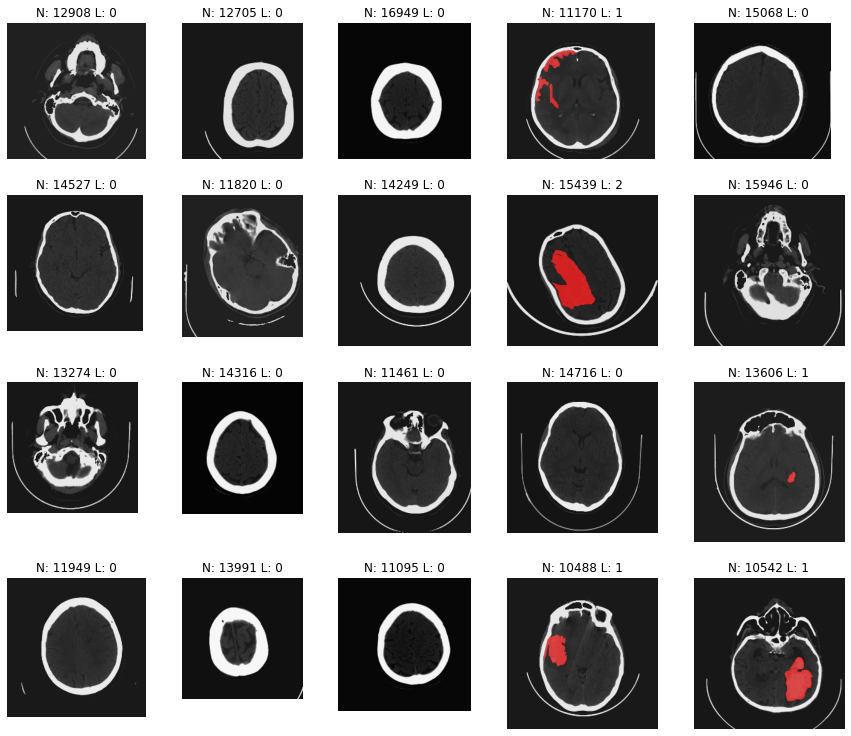

In [29]:
fig = plt.figure(figsize=(15., 15.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 5),  # creates 2x2 grid of axes
                 axes_pad=0.5,  # pad between axes in inch.
                 )

names = [path['name'] for path in paths]
labels = [path['label'] for path in paths]

for ax, img, mask, name, label in zip(grid, images[10:30], masks[10:30], names[10:30], labels[10:30]):
    img = np.uint8((img - img.min()) / (img.max() - img.min())*255)
    overlay = StrokeDataset.overlay(img, mask)
    ax.imshow(overlay); ax.axis('off')
    ax.set_title(f'N: {name} L: {label}')
    

# # plt.show()
plt.savefig('grid.png', bbox_inches = 'tight',
    pad_inches = 0)




In [141]:
img.shape

(51, 51)

# Results

## Classification Results

In [49]:
resnet101_path = Path(r'E:\stroke\classification\ResNet-101-WBCE-lr1e-4-bsize-12-pretrained-0-dataaug-2-TL-0\metric\validation-metric.csv')
resnet50_path = Path(r'E:\stroke\classification\ResNet-50-WBCE-lr1e-4-bsize-16-pretrained-0-dataaug-2-TL-0\metric\validation-metric.csv')
resnet34_path = Path(r'E:\stroke\classification\ResNet-34-WBCE-lr1e-4-bsize-32-pretrained-0-dataaug-2-TL-0\metric\validation-metric.csv')
resnet18_path = Path(r'E:\stroke\classification\ResNet-18-WBCE-lr1e-4-bsize-32-pretrained-0-dataaug-2-TL-0\metric\validation-metric.csv')

In [50]:
resnet18_df = pd.read_csv(resnet18_path, index_col=0)
resnet34_df = pd.read_csv(resnet34_path, index_col=0)
resnet50_df = pd.read_csv(resnet50_path, index_col=0)
resnet101_df = pd.read_csv(resnet101_path, index_col=0)


In [113]:
resnet101_df.tail()

loss  accuracy  meanmetric    recall  specificity
epoch                                                       
96     0.190640  0.938064    0.935874  0.929630     0.942119
97     0.195034  0.944678    0.935965  0.911111     0.960819
98     0.185832  0.954901    0.940169  0.898148     0.982191
99     0.191952  0.937462    0.931103  0.912963     0.949243
100    0.174758  0.943476    0.939882  0.929630     0.950134

In [120]:
def plot_classification_metric(metric):
    fig, ax = plt.subplots(figsize=(8, 4))

    ax.plot(resnet18_df[metric], label='ResNet18')
    ax.plot(resnet34_df[metric], label='ResNet34')
    ax.plot(resnet50_df[metric], label='ResNet50')
    ax.plot(resnet101_df[metric], label='ResNet101')
    
    plt.xlabel('Epoch')
    plt.ylim((0,1))

    plt.legend()
    plt.suptitle(metric)
    
    plt.savefig(f'{metric}.png', bbox_inches = 'tight', pad_inches = 0.1)


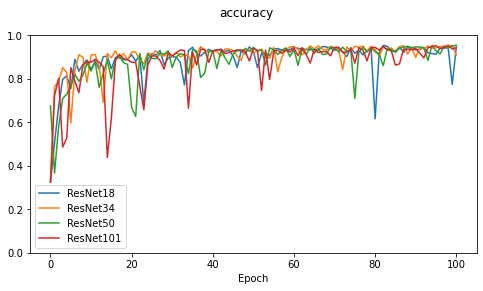

In [121]:
plot_classification_metric('accuracy')

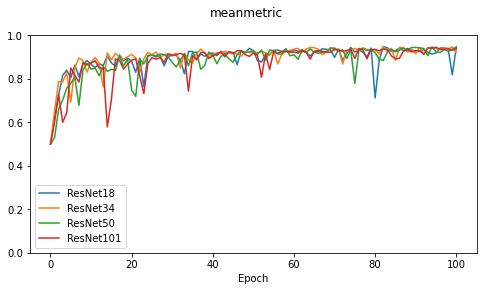

In [122]:
plot_classification_metric('meanmetric')

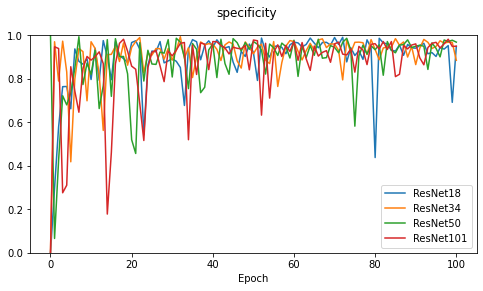

In [123]:
plot_classification_metric('specificity')

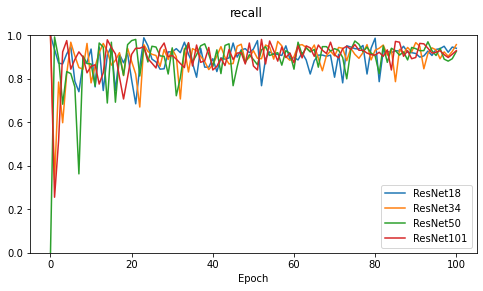

In [124]:
plot_classification_metric('recall')

## Segmentation Results

In [76]:
r2attunet_iou_path = Path(r'E:\stroke\segmentation\R2AttUnet-gn-k025-t2-IoU-lr1e-4-bsize-6-pretrained-0-dataaug-2-TL-0\metric\validation-metric.csv')
resunet_iou_path = Path(r'E:\stroke\segmentation\ResUnet-gn-k1-IoU-lr1e-4-bsize-4-pretrained-0-dataaug-2-TL-0\metric\validation-metric.csv')
resnetplus_dice_path = Path(r'E:\stroke\segmentation\ResUnetPlus-gn-k05-Dice-lr1e-4-bsize-5-pretrained-0-dataaug-2-TL-0\metric\validation-metric.csv')
resnetplus_focal_path = Path(r'E:\stroke\segmentation\ResUnetPlus-gn-k05-Focal-lr1e-4-bsize-5-pretrained-0-dataaug-2-TL-0\metric\validation-metric.csv')
resnetplus_iou_path = Path(r'E:\stroke\segmentation\ResUnetPlus-gn-k05-IoU-lr1e-4-bsize-5-pretrained-0-dataaug-2-TL-0\metric\validation-metric.csv')

In [90]:
t2f = lambda x: float(x.split('[')[1].split(']')[0])

r2attunet_iou_df = pd.read_csv(r2attunet_iou_path, index_col=0).applymap(t2f)
resunet_iou_df = pd.read_csv(resunet_iou_path, index_col=0).applymap(t2f)
resnetplus_dice_df = pd.read_csv(resnetplus_dice_path, index_col=0).applymap(t2f)
resnetplus_focal_df = pd.read_csv(resnetplus_focal_path, index_col=0).applymap(t2f)
resnetplus_iou_df = pd.read_csv(resnetplus_iou_path, index_col=0).applymap(t2f)

In [116]:
def plot_segmentation_metric(metric):
    fig, ax = plt.subplots(figsize=(8, 4))

    ax.plot(r2attunet_iou_df[metric], label='R2-Att-UNet IOU')
    ax.plot(resunet_iou_df[metric], label='ResUNet IOU')
    ax.plot(resnetplus_dice_df[metric], label='ResUNet++ Dice')
    ax.plot(resnetplus_focal_df[metric], label='ResUNet++ Focal')
    ax.plot(resnetplus_iou_df[metric], label='ResUNet++ IOU')
    
    plt.xlabel('Epoch')
    # plt.ylim((0,1))

    plt.legend()
    plt.suptitle(metric)
    
    plt.savefig(f'seg_{metric}.png', bbox_inches = 'tight', pad_inches = 0.1)

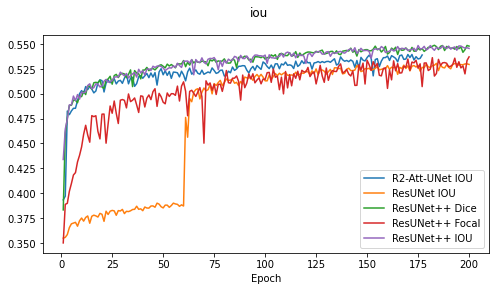

In [117]:
plot_segmentation_metric('iou')

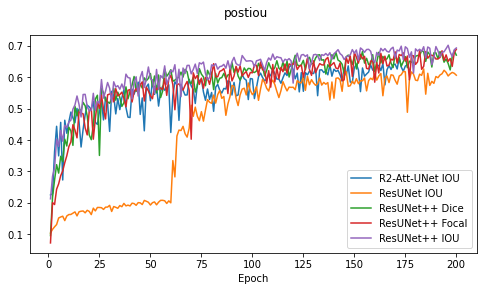

In [118]:
plot_segmentation_metric('postiou')

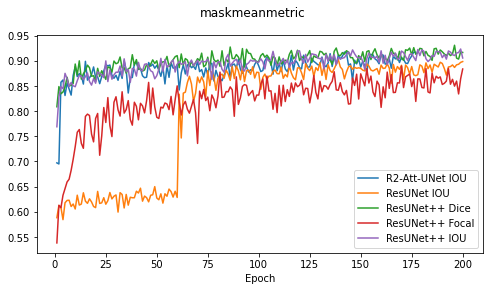

In [119]:
plot_segmentation_metric('maskmeanmetric')